## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#using pandas library and 'read_csv' function to read App_data file and User_review file
df_app_data = pd.read_csv('/content/Play Store Data.csv')
df_user_review = pd.read_csv('/content/User Reviews.csv')

In [4]:
df_app_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df_user_review.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
df_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df_user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [8]:
df_user_review['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [9]:
df_user_review['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64

In [10]:
df_user_review['App'].value_counts()

Angry Birds Classic                                  320
CBS Sports App - Scores, News, Stats & Watch Live    320
Bowmasters                                           320
8 Ball Pool                                          300
Helix Jump                                           300
                                                    ... 
Easy Healthy Recipes                                  31
Dresses Ideas & Fashions +3000                        31
Detector de Radares Gratis                            31
Easy Hair Style Design                                30
Drawing Clothes Fashion Ideas                         30
Name: App, Length: 1074, dtype: int64

# Q.1) Top 5 free strategy games

In [11]:
df_app_data['Type'] = df_app_data['Type'].astype(str)
df_games = df_app_data[df_app_data['Category'] == 'GAME']
df_free_games = df_games[df_games['Type'] == 'Free']
df_strategy_free_games = df_free_games[df_free_games['Genres'] == 'Strategy']
df_strategy_free_games['Reviews'] =df_strategy_free_games['Reviews'].astype(int)
df_strategy_free_games = df_strategy_free_games.sort_values(by=['Rating','Reviews'],ascending=[False,False]).reset_index()
df_strategy_free_games = df_strategy_free_games.drop_duplicates(subset = 'App')
df_strategy_free_games.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,1879,Clash of Clans,GAME,4.6,44893888,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
3,1878,Clash Royale,GAME,4.6,23136735,97M,"100,000,000+",Free,0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
6,1790,Castle Clash: Heroes of the Empire US,GAME,4.6,4578476,24M,"50,000,000+",Free,0,Everyone 10+,Strategy,"July 17, 2018",1.4.51,4.1 and up
7,1998,Stick War: Legacy,GAME,4.6,811040,77M,"10,000,000+",Free,0,Teen,Strategy,"May 10, 2018",1.7.04,4.4 and up
8,1807,Disney Heroes: Battle Mode,GAME,4.6,102107,Varies with device,"5,000,000+",Free,0,Everyone 10+,Strategy,"July 31, 2018",1.2.2,Varies with device


#Q.2) Analysis of most installed apps by category



In [12]:
df_app_data = pd.read_csv('/content/Play Store Data.csv')
df_user_review = pd.read_csv('/content/User Reviews.csv')

In [13]:
df_app_data[df_app_data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df_app_data.loc[10472] = df_app_data.loc[10472].shift()
df_app_data['App'].loc[10472] = df_app_data['Category'].loc[10472]
df_app_data['Category'].loc[10472] = np.nan
print(df_app_data.loc[10472])

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object


In [15]:
df_app_data['Installs'] = df_app_data.Installs.str.replace(",","")
df_app_data['Installs'] = df_app_data.Installs.str.replace("+","")
df_app_data['Installs'] = df_app_data['Installs'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [16]:
df_most_installed = df_app_data.sort_values(by=['Installs'],ascending=False).drop_duplicates(subset = 'App').reset_index().head(100)
df_most_installed = df_most_installed.Category.value_counts().reset_index().rename(columns={'index':'Category','Category':'Counts'})
df_most_installed

,Category,Counts
0,GAME,23
1,COMMUNICATION,23
2,PRODUCTIVITY,9
3,SOCIAL,8
4,TOOLS,8
5,PHOTOGRAPHY,5
6,TRAVEL_AND_LOCAL,5
7,VIDEO_PLAYERS,4
8,NEWS_AND_MAGAZINES,3
9,FAMILY,3


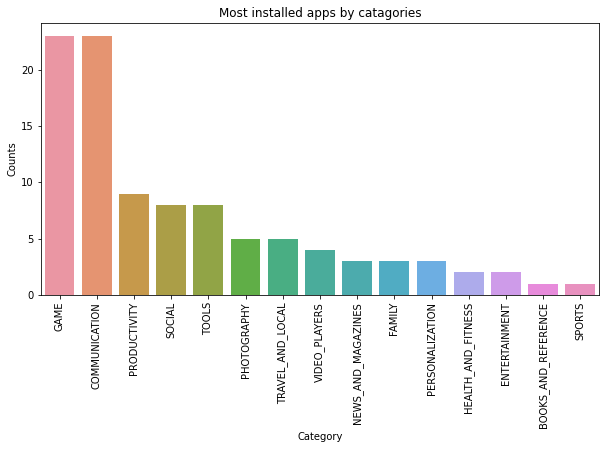

In [17]:
#plot = df_most_installed.plot.pie(y='Counts', title="Title", legend=False,autopct='%1.1f%%')
#plot.show() 


plt.figure(figsize=(10,5))
plt.xlabel("Category")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.title("Most installed apps by catagories")
sns.barplot(data=df_most_installed,x='Category', y='Counts')

#Q.3) Study of 8 ball pool application reviews

In [18]:
df_user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [20]:
df_user_review['Sentiment'] = df_user_review['Sentiment'].astype(str)
df_reveiews_pool = df_user_review[df_user_review['App']=='8 Ball Pool']
df_reveiews_pool['Sentiment'] = df_reveiews_pool.Sentiment.replace('nan',np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
df_reveiews_pool['Sentiment'].isnull().sum()

81

In [22]:
df_reveiews_pool.dropna(subset=['Sentiment'])

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
1262,8 Ball Pool,The better pool game Google Play slightly bugg...,Negative,-0.013333,0.413333
1263,8 Ball Pool,Hate get cue pieces maxed cue. Really wish guy...,Negative,-0.140000,0.300000
1264,8 Ball Pool,"Games alright, bit sketchy either opponent bad...",Negative,-0.303571,0.650595
1265,8 Ball Pool,Hi really like game. I tried ti purchase hallo...,Negative,-0.066667,0.200000
1273,8 Ball Pool,Worst servers Iran... From first time I tried ...,Positive,0.013636,0.462121
...,...,...,...,...,...
1551,8 Ball Pool,I 700 hundred coins I new I 300 even I winning...,Positive,0.272727,0.446591
1552,8 Ball Pool,The Indian's cheat! You see. Can option choose...,Neutral,0.000000,0.000000
1555,8 Ball Pool,It made chickens eat mice. Too many convenient...,Positive,0.162500,0.572222
1556,8 Ball Pool,"I'd give 5 stars everytime I offer free cash, ...",Positive,0.200000,0.266667


In [23]:
df_reveiews_pool = df_reveiews_pool['Sentiment'].value_counts()
df_reveiews_pool

Negative    106
Positive    104
Neutral       9
Name: Sentiment, dtype: int64

([<matplotlib.patches.Wedge at 0x7fecb1ebe610>,
 [Text(0.05520570617522424, 1.0986138220529063, 'Negative'),
  Text(-0.19619074768084524, -1.0823627813835945, 'Postive'),
  Text(1.0908450586552985, -0.14162294308239257, 'Neutral')],
 [Text(0.030112203368304127, 0.5992439029379488, '48.4%'),
  Text(-0.10701313509864284, -0.5903796989365061, '47.5%'),
  Text(0.5950063956301628, -0.07724887804494139, '4.1%')])

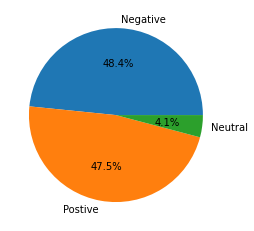

In [24]:
plt.pie(df_reveiews_pool,labels = ['Negative','Postive','Neutral'],autopct='%1.1f%%',)

#Q.4) Playstore Review analysis between google news and BBC news

In [48]:
df_app_data = pd.read_csv('/content/Play Store Data.csv')
df_user_review = pd.read_csv('/content/User Reviews.csv')

In [50]:
df_user_review['Sentiment'] = df_user_review['Sentiment'].astype(str)
df_reveiews_pool_BBC = df_user_review[df_user_review['App']=='BBC News']
df_reveiews_pool_BBC['Sentiment'] = df_reveiews_pool_BBC.Sentiment.replace('nan',np.nan)
df_reveiews_pool_BBC.dropna(subset=['Sentiment'])
df_reveiews_pool_BBC = df_reveiews_pool_BBC[df_reveiews_pool_BBC['Sentiment']!='Neutral']
df_reveiews_pool_BBC = df_reveiews_pool_BBC['Sentiment'].value_counts()
df_reveiews_pool_BBC

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Positive    37
Negative    18
Name: Sentiment, dtype: int64

In [44]:
df_user_review['Sentiment'] = df_user_review['Sentiment'].astype(str)
df_reveiews_pool_Google = df_user_review[df_user_review['App']=='Google News']
df_reveiews_pool_Google['Sentiment'] = df_reveiews_pool_Google.Sentiment.replace('nan',np.nan)
df_reveiews_pool_Google.dropna(subset=['Sentiment'])
df_reveiews_pool_Google = df_reveiews_pool_Google['Sentiment'].value_counts()
df_reveiews_pool_Google

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Positive    78
Negative    39
Name: Sentiment, dtype: int64

           Positive  Negative         Apps
Sentiment        37        18     BBC News
Sentiment        78        39  Google News


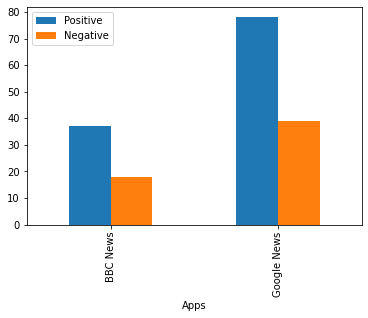

In [76]:
new_df = pd.concat([df_reveiews_pool_BBC,df_reveiews_pool_Google], axis=1)

new_df = new_df.transpose()
new_df['Apps'] = ['BBC News','Google News']
print(new_df)
new_df.plot(x = 'Apps',y=["Positive", "Negative"], kind="bar")

In [58]:
df = pd.DataFrame({
    'Name': ['John', 'Sammy', 'Joe'],
    'Age': [45, 38, 90],
    'Height(in cm)': [150, 180, 160]
})
df

,Name,Age,Height(in cm)
0,John,45,150
1,Sammy,38,180
2,Joe,90,160


#Q.5) finding top 3 paid apps generating most revenue

In [25]:
df_app_data = pd.read_csv('/content/Play Store Data.csv')
df_user_review = pd.read_csv('/content/User Reviews.csv')

In [26]:
df_paid_apps = df_app_data[df_app_data['Type']=='Paid']
df_paid_apps.rename(columns={'Price':'Price($)'},inplace=True)
df_paid_apps['Price($)'] = df_paid_apps['Price($)'].str.replace("$","")
df_paid_apps['Price($)'] = pd.to_numeric(df_paid_apps['Price($)']) 
df_paid_apps['Installs'] = df_paid_apps.Installs.str.replace(",","")
df_paid_apps['Installs'] = df_paid_apps.Installs.str.replace("+","")
df_paid_apps['Installs'] = df_paid_apps['Installs'].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [27]:
df_paid_apps['Total Revenue'] = df_paid_apps['Price($)']* df_paid_apps['Installs']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_paid_apps = df_paid_apps[['App','Installs','Price($)','Total Revenue']]


In [29]:
df_paid_apps = df_paid_apps.drop_duplicates(subset = 'App')
df_paid_apps = df_paid_apps.sort_values(by = ['Total Revenue'],ascending = False)
df_paid_apps

,App,Installs,Price($),Total Revenue
2241,Minecraft,10000000,6.99,69900000.0
5351,I am rich,100000,399.99,39999000.0
5356,I Am Rich Premium,50000,399.99,19999500.0
4034,Hitman Sniper,10000000,0.99,9900000.0
7417,Grand Theft Auto: San Andreas,1000000,6.99,6990000.0
...,...,...,...,...
5945,Ain Arabic Kids Alif Ba ta,0,2.99,0.0
5486,AP Series Solution Pro,0,1.99,0.0
6692,cronometra-br,0,154.99,0.0
9337,EG | Explore Folegandros,0,3.99,0.0


In [30]:
print(df_paid_apps.head(5))


                                App  Installs  Price($)  Total Revenue
2241                      Minecraft  10000000      6.99     69900000.0
5351                      I am rich    100000    399.99     39999000.0
5356              I Am Rich Premium     50000    399.99     19999500.0
4034                  Hitman Sniper  10000000      0.99      9900000.0
7417  Grand Theft Auto: San Andreas   1000000      6.99      6990000.0
